# Révision

Dans les cours et TPs précédents, vous avez étudié des algorithmes de base du traitement d'images en couleurs et en niveaux de gris. Notamment, nous avons vu les notions suivantes :

- Représentation d'images en niveaux de gris et RGB sous forme de tableaux de deux et de trois dimensions
- Histogrammes d'images en niveaux de gris
- Convolution et _padding_
- Floutage et détection de bords en utilisant des convolutions (filtres linéaires) et la médiane (filtre d'ordre / non-linéaire)
- Seuillage binaire
- Recadrage dynamique et égalisation d'histogramme

Dans les TPs précédents, vous avez implémenté certains de ces algorithmes à la main afin de mieux comprendre leur fonctionnement et complexité. Dans ce TP de révision et dans l'évaluation qui suit, vous pouvez utiliser vos propres implémentations de chacune de ces fonctions, ou bien utiliser les fonctions fournies par les librairies **OpenCV** et **Numpy**. 

### Import des modules et fonctions de base

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Operateurs implémentés dans les TPs 1, 2 et 3

def moyenneur(img, taille_filtre):
    return cv.blur(img,(taille_filtre,taille_filtre),borderType=cv.BORDER_CONSTANT)

def sobel(img):
    Gx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
    Gy = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

    moduleGradient = np.sqrt(Gx**2 + Gy**2)
    gradientNormalise = 255*(moduleGradient - np.min(moduleGradient))/(np.max(moduleGradient) - np.min(moduleGradient))

    return gradientNormalise

def histogramme(img):
    hist = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i][j]] += 1
    return hist 
    
def histogrammeCumule(img):
    hist = histogramme(img)
    for k in range(1,256):
        hist[k] += hist[k-1]
    return hist  

def normalisation(img):
    resultat = np.round(255*((img-np.min(img))/(np.max(img)-np.min(img))))
    return resultat.astype('uint8')
    
def egalisation(img):
    min = np.min(img)
    max = np.max(img)
    hist_cum = histogrammeCumule(img)
    hist_cum_normalise = hist_cum/(np.max(hist_cum))*255
    img_egalisee = img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_egalisee[i,j] = hist_cum_normalise[img_egalisee[i,j]]
    return img_egalisee

### Rappel des fonctions de base

```image = cv.imread("test.png")``` $\rightarrow$ charge une image RVB sous forme d'un tableau à trois dimensions (bleu, vert et rouge)

Notez que ```image[:,:,0]``` correspond à la composante Bleu, ```image[:,:,1]``` correspond à la composante Verte, et ```image[:,:,2]``` correspond à la composante Rouge.

```image_gris = cv.imread("test.png",0)``` $\rightarrow$ charge "test.png" comme une image en niveau de gris (matrice/tableau à deux dimensions)

```image = image[:,:,::-1]``` $\rightarrow$ inverse la première et la troisième composante de l'image (après cette opération, ```image[:,:,0]``` correspond à la composante Rouge et ```image[:,:,2]``` correspond à la composante Bleu)

```tab = np.zeros(shape=(10,10,3))```  $\rightarrow$ crée un tableau de zéros de dimension $10 \times 10 \times 3$

```_,imgBlancNoir = cv.threshold(image_gris,seuil,255,cv.THRESH_BINARY)``` $\rightarrow$ calcule le seuillage binaire de l'image ```image_gris``` : les pixels ayant un niveau de gris supérieur ou égal à ```seuil``` sont attribués à 255 (blanc) dans l'image résultante

```image_median = cv.medianBlur(image_gris, 5)``` $\rightarrow$ applique un filtre médian de taille 5x5 sur l'image d'entrée

```plt.imshow(image)``` $\rightarrow$ affiche une image en couleurs

```plt.imshow(image_gris, cmap="gray", vmin=0, vmax=255)``` $\rightarrow$ affiche "correctement" une image en niveau de gris

```hist = histogramme(image_gris)``` $\rightarrow$ calcule l'histogramme d'une image en niveau de gris sous forme d'un tableau de taille 256

```plt.plot(histogramme(img))``` $\rightarrow$ affiche l'histogramme d'une image en utilisant la fonction definie ci-dessus

Si plusieurs images/figures doivent être affichées dans une même cellule, ajoutez ```plt.show()``` après chaque ```plt.imshow(...)``` et chaque ```plt.plot(...)```

## 1 Seuillage d'images RVB et en niveau de gris, histogrammes et filtres

**Q1** Ouvre et affichez l'image en couleur _chat.png_.

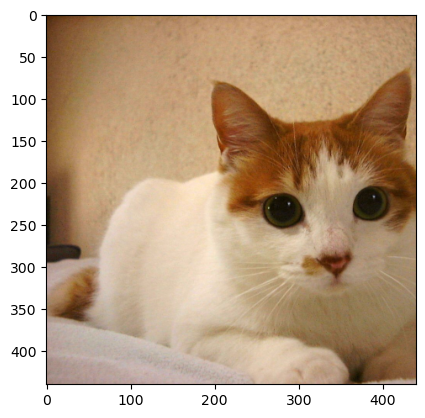

In [3]:
chat = cv.imread('chat.png')
plt.imshow(chat[:,:,::-1])

**Q2** Affichez les composantes R, G et B individuellement sous forme d'images en niveaux de gris.

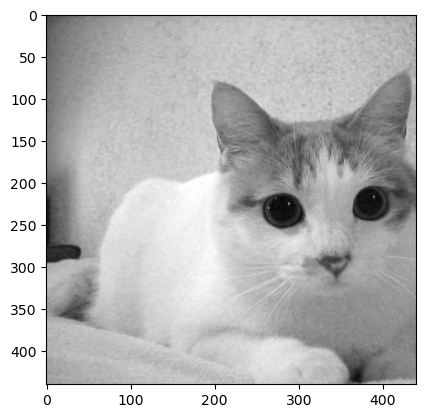

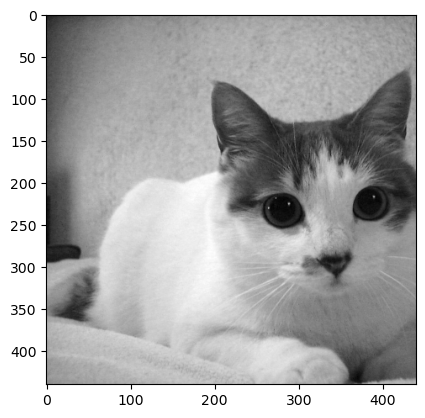

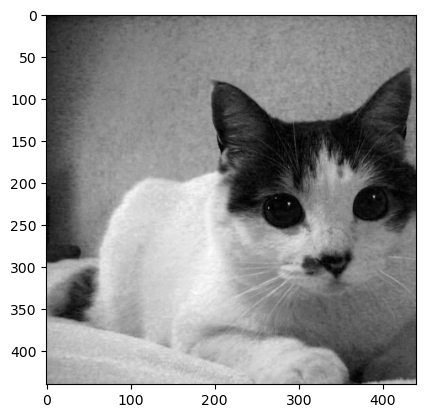

In [4]:
chat = chat[:,:,::-1]

# Rouge
plt.imshow(chat[:,:,0], cmap='gray')

plt.show()

# Vert
plt.imshow(chat[:,:,1], cmap='gray')

plt.show()

# Bleu
plt.imshow(chat[:,:,2], cmap='gray')

plt.show()

**Q3** En utilisant la formule ```I_gris = 0.299 ∗ R + 0.587 ∗ G + 0.114 ∗ B```, convertissez l'image RGB en une image en niveau de gris (vous pouvez le faire avec ou sans utiliser des boucles)

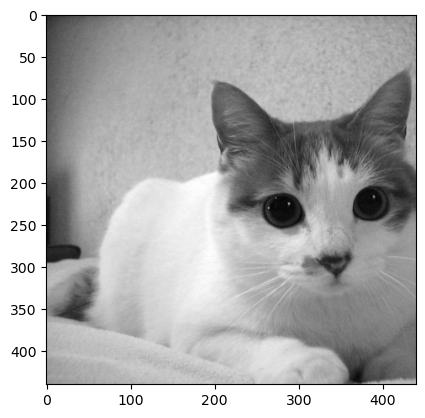

In [5]:
I_gris = 0.299 * chat[:,:,0] + 0.587 * chat[:,:,1] + 0.114 * chat[:,:,2]

plt.imshow(I_gris, cmap='gray')

**Q4** Calculez l'histogramme de l'image en niveau de gris résultante. Que peut-on conclure en regardant seulement son histogramme ? Est-ce une image sombre ou bien lumineuse ? Que peut-on dire concernant son niveau de contraste ?

In [6]:
plt.plot(histogramme(I_gris))

# C'est une image lumineuse

# Le niveau de contraste est équilibré, l'intervalle d'intensité de la plupart des pixels est bien réparti

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

**Q5** Créez une nouvelle image ```I_gris_2``` de même dimension que ```I_gris``` où la valeur de chaque pixel est remplacée par la moitié de sa valeur originale plus 100 (afin de bien afficher l'image résultante, utilisez ```plt.imshow(I_gris_2, cmap="gray", vmin=0, vmax=255)```). 

Que fait-il cette opération ? 

Comparez l'histogramme de cette nouvelle image avec celui de ```I_gris```.

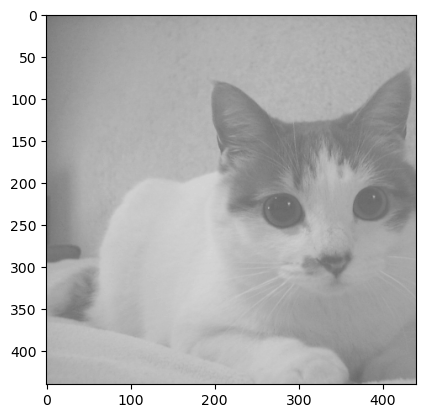

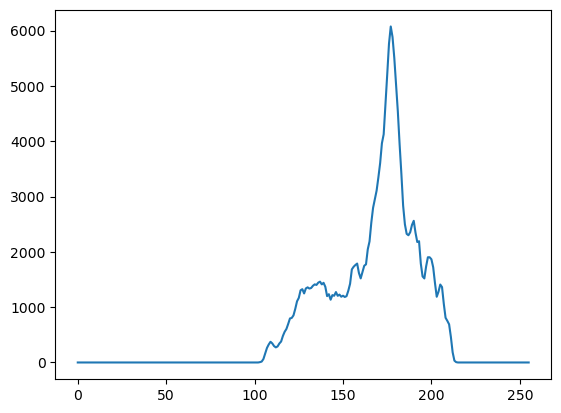

In [247]:
I_gris_2 = I_gris * 1/2 + 100

plt.imshow(I_gris_2, cmap="gray", vmin=0, vmax=255)

plt.show()

plt.plot(histogramme(I_gris_2.astype('uint8')))

plt.show()

# Cette opération réduit le contraste, l'image semble beaucoup moins sombre

**Q6** Comment peut-on rétablir le niveau de contraste de l'image ```I_gris_2``` ? Testez les deux méthodes vues en cours.

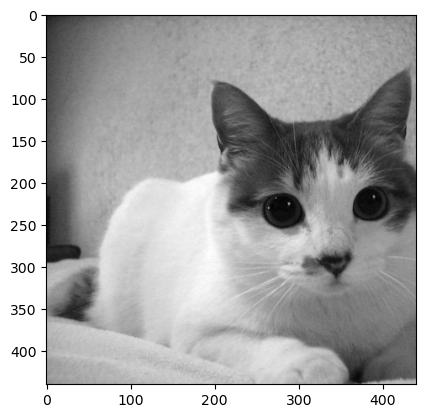

In [249]:
I_gris_3 = (I_gris_2 - np.min(I_gris_2)) / (np.max(I_gris_2) - np.min(I_gris_2)) * 255

plt.imshow(I_gris_3, cmap="gray", vmin=0, vmax=255)

plt.show()

**Q7** À partir de l'image en niveau de gris, segmentez les yeux du chat en produisant une image binaire où seulement les pixels appartenant aux yeux sont blancs, et tous les autres sont en noir (notez que le résultat ne sera pas forcément parfait). 

Si la région devant être segmentée est plus sombre que le reste de l'image, vous pouvez utiliser son inverse, c.-à-d., ```255 - I_gris```.

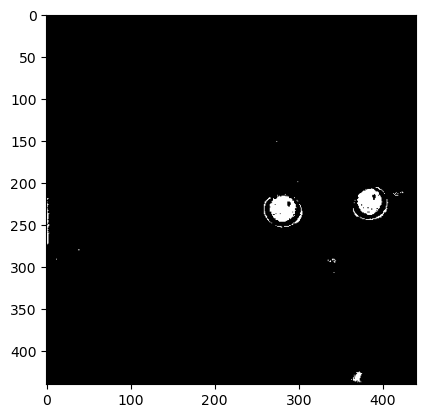

In [219]:
I_gris_inverse = 255 - I_gris

_, I_gris_yeux = cv.threshold(I_gris_inverse.astype("uint8"), 230, 255, cv.THRESH_BINARY)

plt.imshow(I_gris_yeux, cmap='gray')

**Q8** Maintenant, faites le même, mais à partir des composantes rouge, verte et bleue de l'image originale (notez que le résultat ne sera pas forcément parfait).

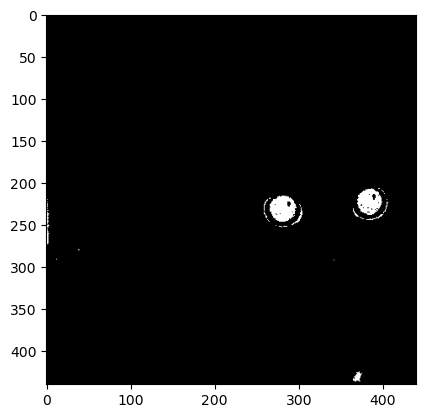

In [221]:
# chat_inverse = 255 - chat

# _, chat_yeux = cv.threshold(chat_inverse.astype("uint8"), 240, 255, cv.THRESH_BINARY)

# plt.imshow(chat_yeux)

yeux = chat.copy()

for i in range(yeux.shape[0]):
    for j in range(yeux.shape[1]):
        yeux[i, j] = [255, 255, 255] if np.sum(yeux[i, j]) < 25*3 else [0,0,0]

plt.imshow(yeux)

**Q9** En suivant le même principe de la question précédente, segmentez les cerises dans l'image ```cerises.png```.

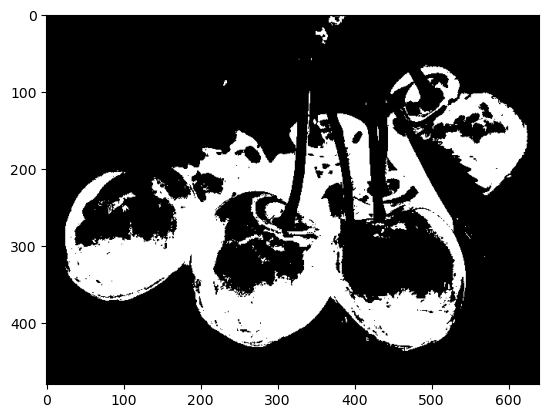

In [225]:
# cerises = cv.imread('cerises.png', 0)
# cerises = cv.imread('cerises.png')

# cerises_inverse = 255 - cerises

# _, cerises_contour = cv.threshold(cerises_inverse.astype("uint8"), 240, 255, cv.THRESH_BINARY)

# # plt.imshow(cerises_contour, cmap='gray')
# plt.imshow(cerises_contour)

cerises = cv.imread("cerises.png")

for i in range(cerises.shape[0]):
    for j in range(cerises.shape[1]):
        cerises[i, j] = [255, 255, 255] if np.sum(cerises[i, j]) < 50*3 else [0,0,0]

plt.imshow(cerises)

**Q10** À partir de l'image bruitée ```renard_bruit.png```, trouvez les opérations permettant d'obtenir des contours binaires comme affiché ci-dessous.

![Image](renard_bruit.png) ![Image](renard_contours.png)

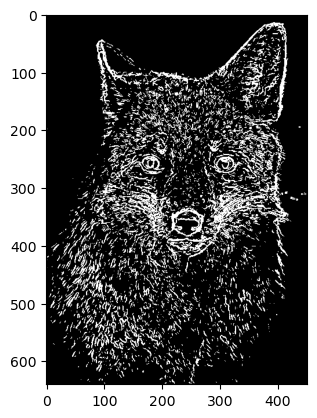

In [234]:
renard = cv.medianBlur(cv.imread('renard_bruit.png', 0), 3)

seuil,contours = cv.threshold(sobel(renard),40,255,cv.THRESH_BINARY)

plt.imshow(contours, cmap = 'gray')

# def roberts(img):
#     gx = cv.filter2D(src=img, ddepth=-1, kernel=np.array([
#         [0, 0, 0],
#         [-1, 0, 1],
#         [0, 0, 0],
#     ]))
#     gy = cv.filter2D(src=img, ddepth=-1, kernel=np.array([
#         [0, -1, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#     ]))
#     moduleGradient = np.sqrt((gx**2)+(gy**2))
#     moduleGradient = (moduleGradient - np.min(moduleGradient))/(np.max(moduleGradient)-np.min(moduleGradient)) * 255
#     return moduleGradient.astype("uint8")

# renard = cv.imread("renard_bruit.png")
# renard = cv.medianBlur(renard, 3)

# seuil = 30
# moduleGradient = sobel(renard)
# seuil,contours = cv.threshold(moduleGradient,seuil,255,cv.THRESH_BINARY)
# plt.subplot(1,2,1)
# plt.imshow(renard, cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(contours, cmap='gray')
# plt.show()